In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [2]:
import warnings 
warnings.filterwarnings('ignore') #filter non important warnings

In [3]:
cars = pd.read_csv("CarPrice_Assignment.csv")
#data from https://www.kaggle.com/code/zabihullah18/car-price-prediction/input?select=CarPrice_Assignment.csv

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
print(cars.info())
#Gives us a summary of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars = cars.rename(columns = {'symboling':'safetyrating'})

In [7]:
cars['safetyrating'].astype('category').value_counts()
#returns frequency of values in the safetyrating variable

safetyrating
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [8]:
cars['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [9]:
cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

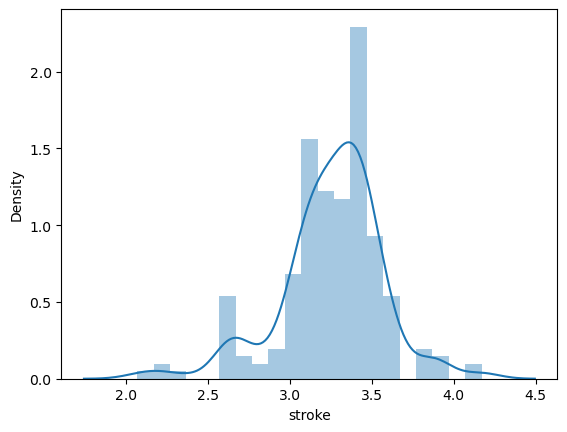

In [10]:
sns.distplot(cars['stroke'])
plt.show()

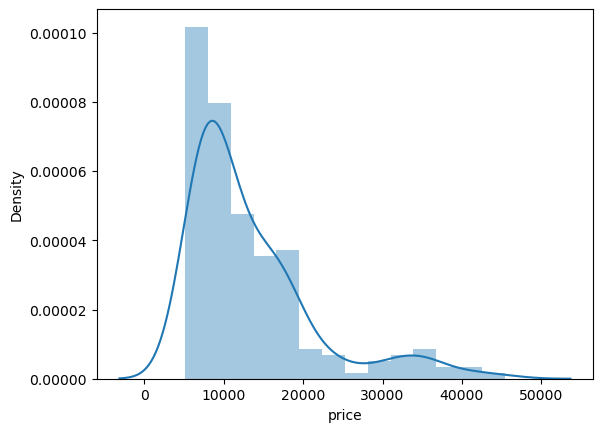

In [11]:
sns.distplot(cars['price'])
plt.show()

In [12]:
#Using linear regression to observe relationships in data
#hence dropping features that dont add value to any relationship
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
#this purges all categorical features
cars_numeric.head()

,car_ID,safetyrating,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
#car_id can also be considered numerical/doesnt provide any linear relationship with cost
cars_numeric = cars_numeric.drop(['car_ID'], axis = 1)
cars_numeric.head()

,safetyrating,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1000 with 0 Axes>

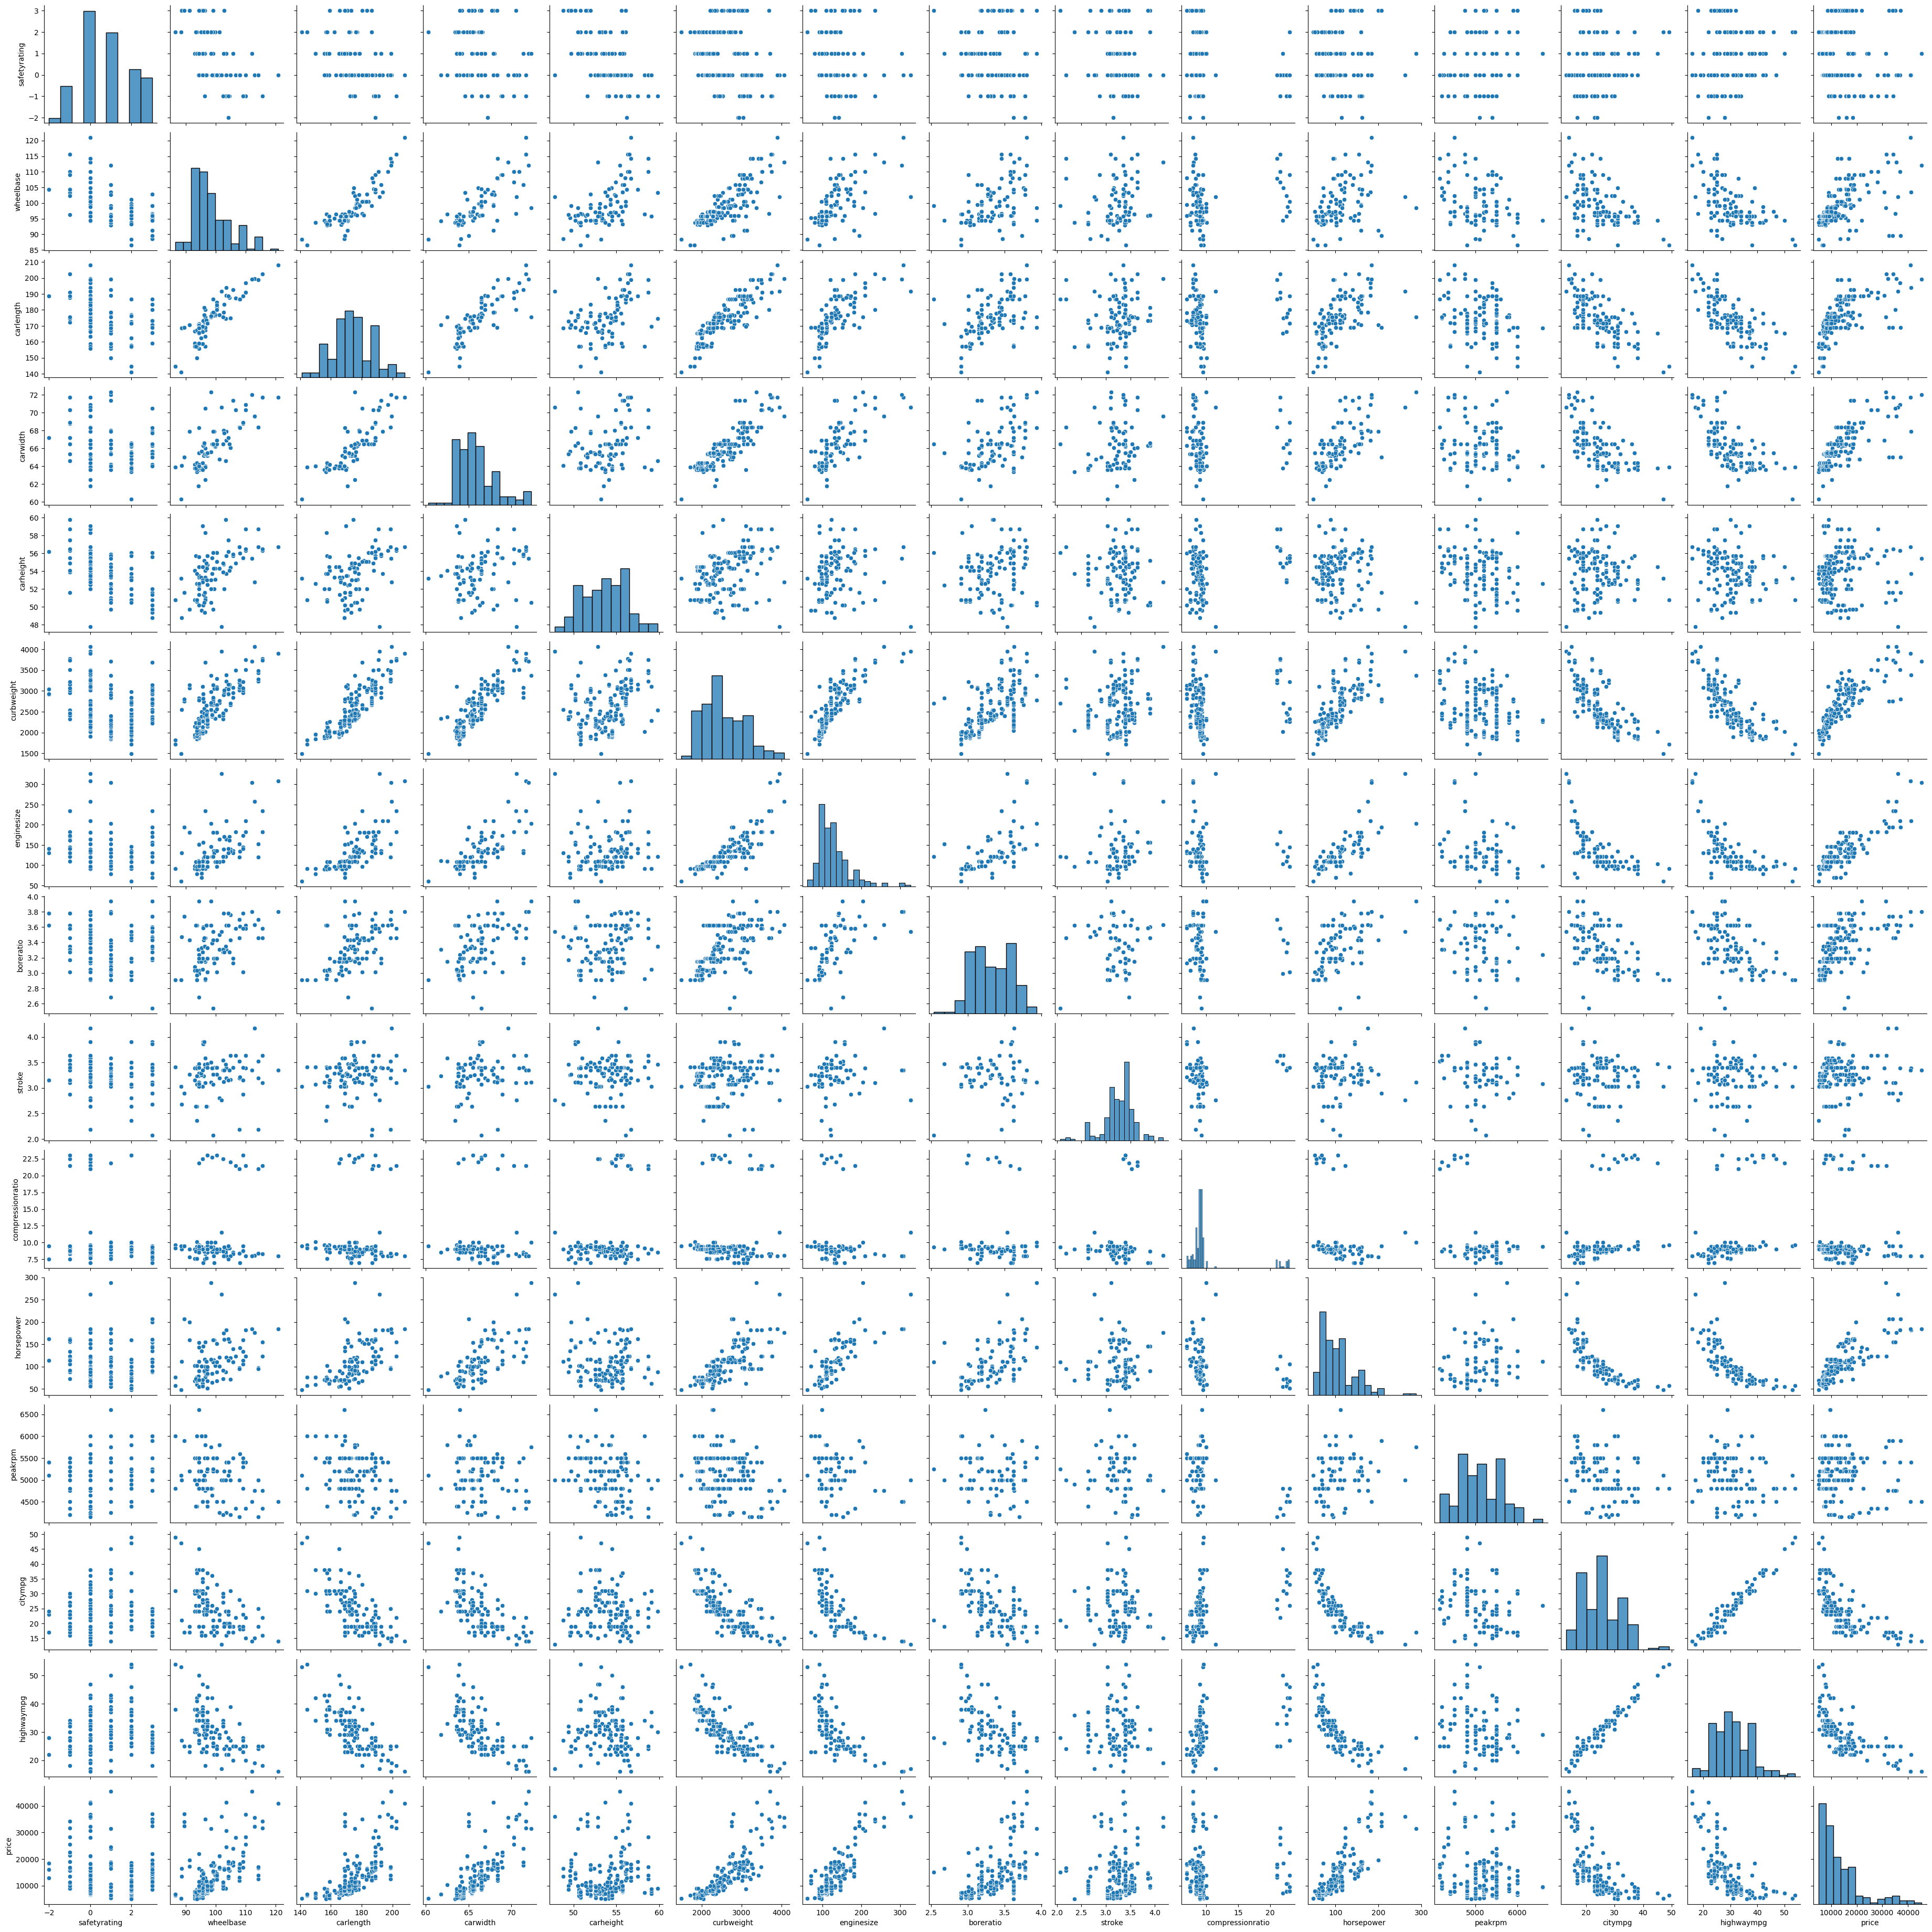

In [14]:
plt.figure(figsize = (20, 10))
sns.pairplot(cars_numeric)
plt.show
#Display a 20 * 10 grid of relationships using cars_numeric data set

In [15]:
cor = cars_numeric.corr()
cor

,safetyrating,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
safetyrating,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


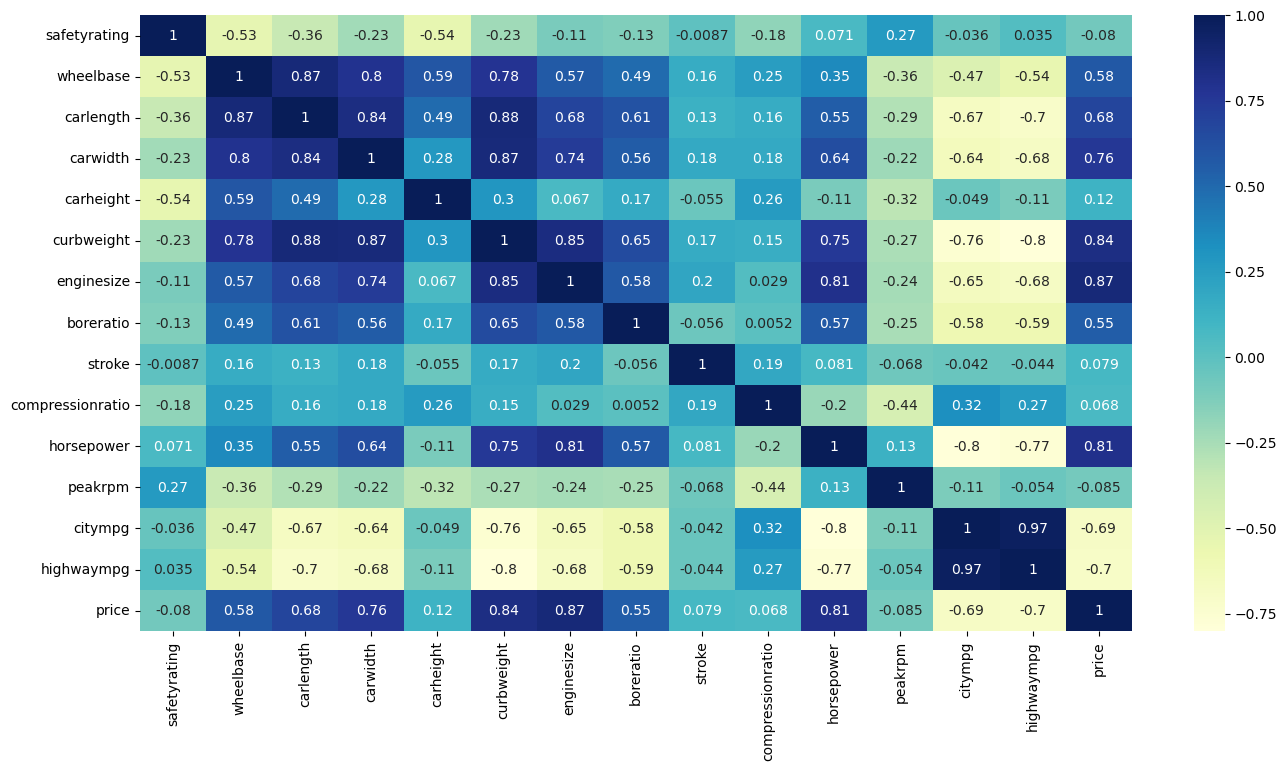

In [16]:
#graph heatmap accoring to correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap = "YlGnBu", annot = True)

plt.show()

In [17]:
#wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower have strong correlations 
#most likley collinearity with multiple variables 
#therefore feature engineer 


In [18]:
#pull car brand from carName
cars['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [19]:
#isolate first name of the name
#lambda function to ignore after the first space 
carNames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carNames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [20]:
import re 
p = re.compile(r'\w+-?\w+')
#\w+ searches for multiple occurences of words and -? matches a hyphen that appears either 0 or 1 times
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [21]:
#create new feature per row/ calling it car_company 
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p,x)[0])
#run the number of times each car brand appears in the entire dataset
cars['car_company'].astype('category').value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [22]:
#need to data clean a bit because of the spelling mistakes
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [23]:
cars['car_company'].astype('category').value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [24]:
cars = cars.drop('CarName', axis = 1)

In [25]:
cars.head()

,car_ID,safetyrating,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [26]:
#door number and cylindernumber is a numerical value being expressed as categorical

In [27]:
cars['cylindernumber'].astype('category').value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [28]:
cars['doornumber'].astype('category').value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [29]:
#replace words with numbers
def change_to_num(x):
    return x.map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight':8, 'twelve': 12})

cars[['cylindernumber', 'doornumber']] = cars[['cylindernumber', 'doornumber']].apply(change_to_num)
#using the features row by row as parameters and applying the method to them, converting the text to number

In [30]:

cars_categorical = cars.select_dtypes(include = ['object'])
cars_categorical.head()


,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [31]:
#convert categorical into dummies 
cars_dummies = pd.get_dummies(cars_categorical, drop_first = True)
cars_dummies.head()
#drop_first to prevent repetion in already known data

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
cars_dummies = cars_dummies.apply(lambda x: x.astype(int))

In [33]:
#replace categorical variables with the dummies
cars = cars.drop(list(cars_categorical.columns), axis = 1)


In [34]:
cars.head()

,car_ID,safetyrating,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
cars = pd.concat([cars,cars_dummies], axis = 1)

In [36]:
cars.head()

,car_ID,safetyrating,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cars.drop('car_ID', axis = 1, inplace = True)

In [38]:
from sklearn.model_selection import train_test_split
#assign train and test data based off 70/30 splits with 100% randomness
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state=100)

In [39]:
cars_numeric.columns

Index(['safetyrating', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [40]:
#learned, cleaned, and prepped data for model
#need to scale data for model 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#list of variables that need scaling
varlist = ['safetyrating', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Scale variables using standardization
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [41]:
df_train.head()

,safetyrating,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


In [42]:
#split training dataset to by feature we need to predict
y_train = df_train.pop('price')
x_train = df_train

In [43]:
lm = LinearRegression()
lm.fit(x_train, y_train)
#create a best fit line

LinearRegression()

In [44]:
print(lm.coef_)

[-8.85082799e-03  2.05396206e-02  2.15459688e-01 -1.20891864e-01
  2.14312437e-01 -1.69734529e-01  2.71975134e-01 -2.88819050e-01
  9.98176607e-01 -3.16364315e-01 -1.09027004e-01 -4.45741225e-01
 -1.28216803e-01  1.89046429e-01  6.10383234e-02  7.95225308e-02
 -7.13939879e-01  3.92563218e-01 -5.68397039e-01 -6.33741325e-01
 -5.33209547e-01 -4.44213621e-01 -6.30834556e-02  4.57246372e-02
  9.85062979e-01  9.02650092e-01  9.94703704e-01  2.82949424e-01
  6.10461201e-01  8.12155616e-03  1.12048455e+00  1.19956250e-01
 -3.05423110e-01  7.13939879e-01 -4.44089210e-16 -4.00301122e-02
 -5.85575952e-02  0.00000000e+00 -1.28333697e-01  1.01695043e+00
  1.12409662e-01 -5.91117054e-01 -7.18611643e-01 -5.01548738e-01
 -3.06608953e-01 -2.48183458e-01 -1.57753086e-01 -1.11022302e-16
 -8.09182737e-01 -2.48597762e-01 -1.33327298e+00 -7.13453493e-01
  7.94779273e-01 -3.31355674e-01  7.05291444e-01 -3.74601778e-01
 -1.77619987e-01 -1.76633338e-01  1.86531496e-02]


In [45]:
print(lm.intercept_)

0.970168808315679


In [46]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select = 15)
#first feature is mandatory, but must define what second feature I am calling 
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[False False False False  True False False False  True False False  True
 False False False False  True False False False False False False False
  True False  True False  True False  True False False  True False False
 False False False  True False False False False False False  True False
  True False  True False False  True False  True False False False]
[41 39 28 31  1 26 17 32  1 18 33  1 23 24 37 30  1 16 14 12 13 15 35 38
  1 22  1 20  1 42  1 36 10  1 43 27 19 45  9  1 34  8  6  4 25 29  1 44
  1  2  1  7 11  1 21  1  3  5 40]


In [47]:
import statsmodels.api as sm
col1 = x_train.columns[rfe1.support_]
#train the columns that were included (indicated by boolean values of support)
x_train_rfe1 = x_train[col1]
x_train_rfe1 = sm.add_constant(x_train_rfe1)

x_train_rfe1.head()

,const,carwidth,enginesize,compressionratio,fueltype_gas,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,fuelsystem_idi,car_company_bmw,car_company_mazda,car_company_mitsubishi,car_company_peugeot,car_company_renault,car_company_subaru
122,1.0,-0.924500,-0.660242,-0.172569,1,0,0,0,0,0,0,0,0,0,0,0
125,1.0,1.114978,0.637806,-0.146125,1,0,0,0,0,0,0,0,0,0,0,0
166,1.0,-0.833856,-0.660242,-0.172569,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,-0.788535,0.123485,-0.278345,1,0,0,0,0,0,0,0,0,0,0,0
199,1.0,0.616439,0.123485,-0.675002,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, x_train_rfe1.astype(float)).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           4.59e-64
Time:                        18:16:31   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
    

,Features,VIF
4,fueltype_gas,inf
5,enginelocation_rear,inf
7,enginetype_ohcf,inf
9,fuelsystem_idi,inf
15,car_company_subaru,inf
3,compressionratio,42.32
13,car_company_peugeot,9.73
6,enginetype_l,8.99
1,carwidth,3.38
2,enginesize,3.30


In [51]:
#create4 a new model with 10 features to get rid of the ones with infinity vif
#an infinity VIF means that variable is an LC of other features 
from sklearn.feature_selection import RFE

rfe2 = RFE(lm, n_features_to_select = 10)

rfe2.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [52]:
#basically repeat everything from the 15 feature model 
col2 = x_train.columns[rfe2.support_]

x_train_rfe2 = x_train[col2]

x_train_rfe2 = sm.add_constant(x_train_rfe2)

lm2 = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           3.98e-64
Time:                        18:16:31   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginelocation_rear,inf
5,enginetype_ohcf,inf
10,car_company_subaru,inf
8,car_company_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
6,enginetype_rotor,1.15
7,car_company_bmw,1.09


In [55]:
#still need to drop top 3 features
x_train_rfe2.drop('car_company_subaru', axis = 1, inplace = True)

In [56]:
x_train_rfe2 = sm.add_constant(x_train_rfe2)

lm2 = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           3.98e-64
Time:                        18:16:32   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [57]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,car_company_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
3,enginelocation_rear,1.19
6,enginetype_rotor,1.15
5,enginetype_ohcf,1.12
7,car_company_bmw,1.09
9,car_company_renault,1.01


In [58]:
#dropping enginetype due to a pvalue greater than 0.05
x_train_rfe2.drop('enginetype_ohcf', axis = 1, inplace = True)

In [59]:
# Refitting with 8 variables
x_train_rfe2 = sm.add_constant(x_train_rfe2)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           8.22e-65
Time:                        18:16:32   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [60]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,car_company_peugeot,9.49
4,enginetype_l,8.94
2,enginesize,3.20
1,carwidth,3.17
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
6,car_company_bmw,1.09
8,car_company_renault,1.01


In [61]:
#still high VIF for car_company_peugeot and enginertype_l - should be below 5 
x_train_rfe2.drop('car_company_peugeot', axis = 1, inplace = True)

In [62]:
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           2.49e-63
Time:                        18:16:32   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [63]:
#enginetypel has large p value need to remove 
x_train_rfe2.drop('enginetype_l', axis = 1, inplace = True)
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2.astype(float)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           2.92e-64
Time:                        18:16:32   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [64]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,3.01
1,carwidth,2.68
4,enginetype_rotor,1.12
0,const,1.10
5,car_company_bmw,1.09
3,enginelocation_rear,1.08
6,car_company_renault,1.00


In [65]:
#completed analyzing the p and VIF values and now can make predictions
y_train_price = lm2.predict(x_train_rfe2)

Text(0.5, 0, 'Errors')

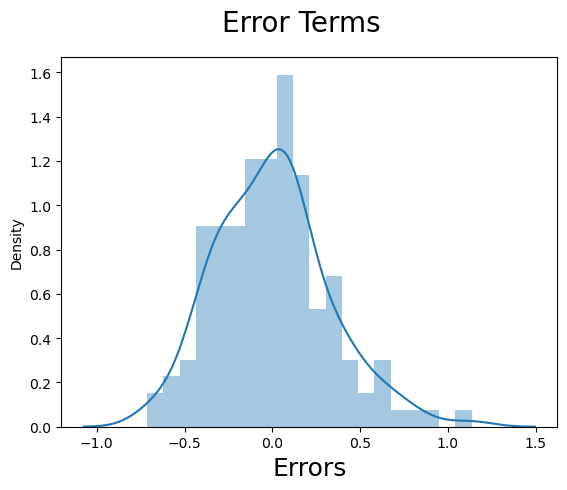

In [66]:
#analyzing the residuals
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [67]:
#Now testing we need to scale the test data as we did with the train data
df_test[varlist] = scaler.transform(df_test[varlist])

In [68]:
y_test = df_test.pop('price')
x_test = df_test

In [69]:
col2

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

In [70]:
x_test_rfe2 = x_test[col2]

In [71]:
#drop the variables that had a high p-Value/VIF
x_test_rfe2 = x_test_rfe2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'], axis = 1)

In [72]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 160 to 128
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                62 non-null     float64
 1   carwidth             62 non-null     float64
 2   enginesize           62 non-null     float64
 3   enginelocation_rear  62 non-null     int64  
 4   enginetype_rotor     62 non-null     int64  
 5   car_company_bmw      62 non-null     int64  
 6   car_company_renault  62 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 3.9 KB


In [73]:
y_pred = lm2.predict(x_test_rfe2)

Text(0, 0.5, 'y_pred')

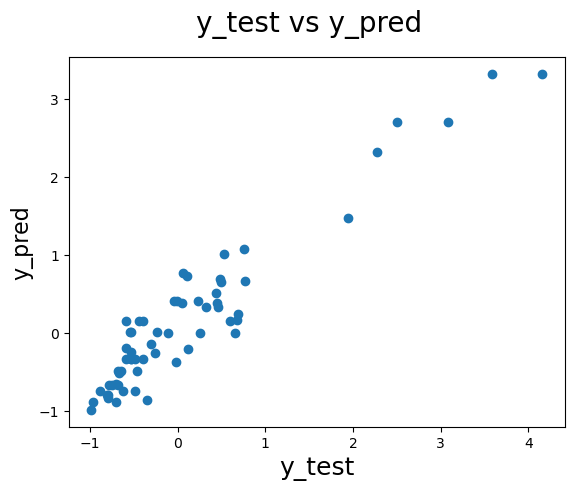

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8997211435182687

In [76]:
#When the Model has been TUNED to 6 features, the r^2 value on training and test data is ~90%.
#This means from these 6 features, 90% of the time we can predict the correct price 

In [77]:
col2 = col2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'])

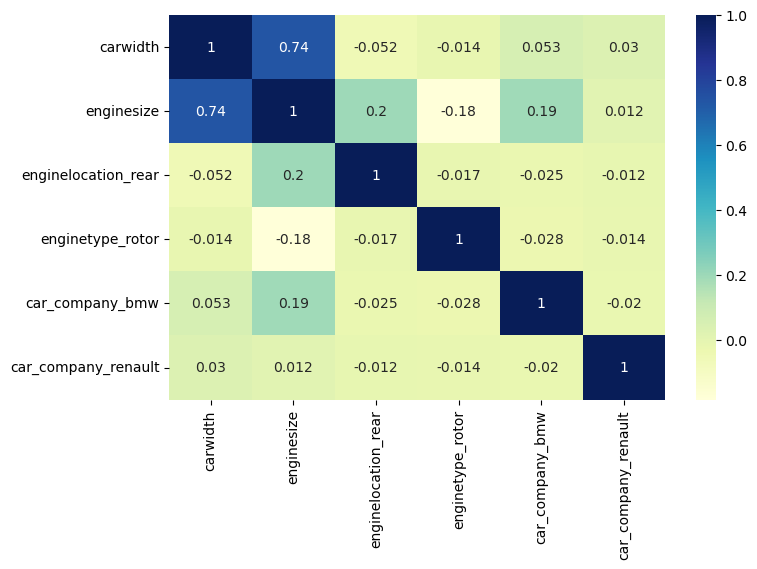

In [78]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(cars[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()